In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

read of data

In [ ]:
df = pd.read_csv('Walmart.csv')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**Insights:**

*   Here the target columns is Weekly_Sales.
*   The data is related to walmart store of united state of america. Where **Store**, **Holiday_Flag** are categorrical in nature
*   Date columns should be divide in week_day, month and year 



**Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Here Date columns is **object** and other remain columns are **interger or float** in nature.

In [ ]:
#change the dataframe and reframe it
df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [ ]:
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


In [ ]:
print('years unique value', df.year.unique())
print('months unique value', df.month.unique())
print('weekday unique value', df.weekday.unique())

years unique value [2010 2011 2012]
months unique value [ 5 12  2  3  9  4  7 11  6  8 10  1]
weekday unique value [6 3 4 0 5 1 2]


months and weekday are as usual, but the data is taken from year 2010, 2011, 2012 only.

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


In [ ]:
original_df = df.copy()

In [ ]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('The dataset doesn\'t have any duplicates')
else:
    print('Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')

The dataset doesn't have any duplicates


In [ ]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

data-set doesn't have null values

**Data Visualization**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


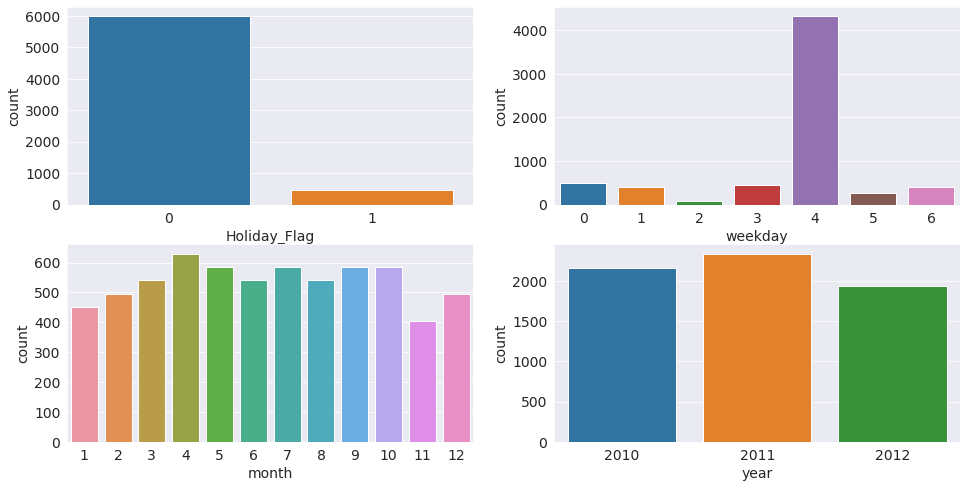

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#axes[0,0].set_title('Holiday Count plot')
sns.countplot(x='Holiday_Flag', data=df, ax= axes[0,0])

#axes[0,1].set_title('Weekday Count plot')
sns.countplot(x='weekday', data=df, ax= axes[0,1]);

#axes[1,0].set_title('month Count plot')
sns.countplot(x='month', data=df, ax= axes[1,0]);

#axes[1,1].set_title('year Count plot')
sns.countplot(x='year', data=df, ax= axes[1,1]);

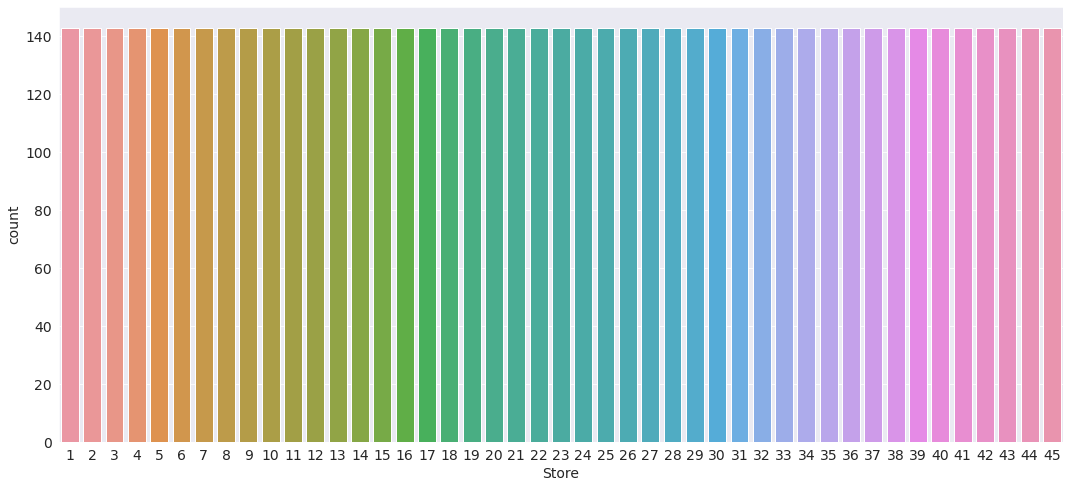

In [ ]:
plt.figure(figsize= (18,8))
sns.countplot(x= 'Store', data= df);
plt.show()

all the store have equal number of data in the set 

In [ ]:
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.9,0,42.31,2.572,211.096358,8.106,6,5,2010


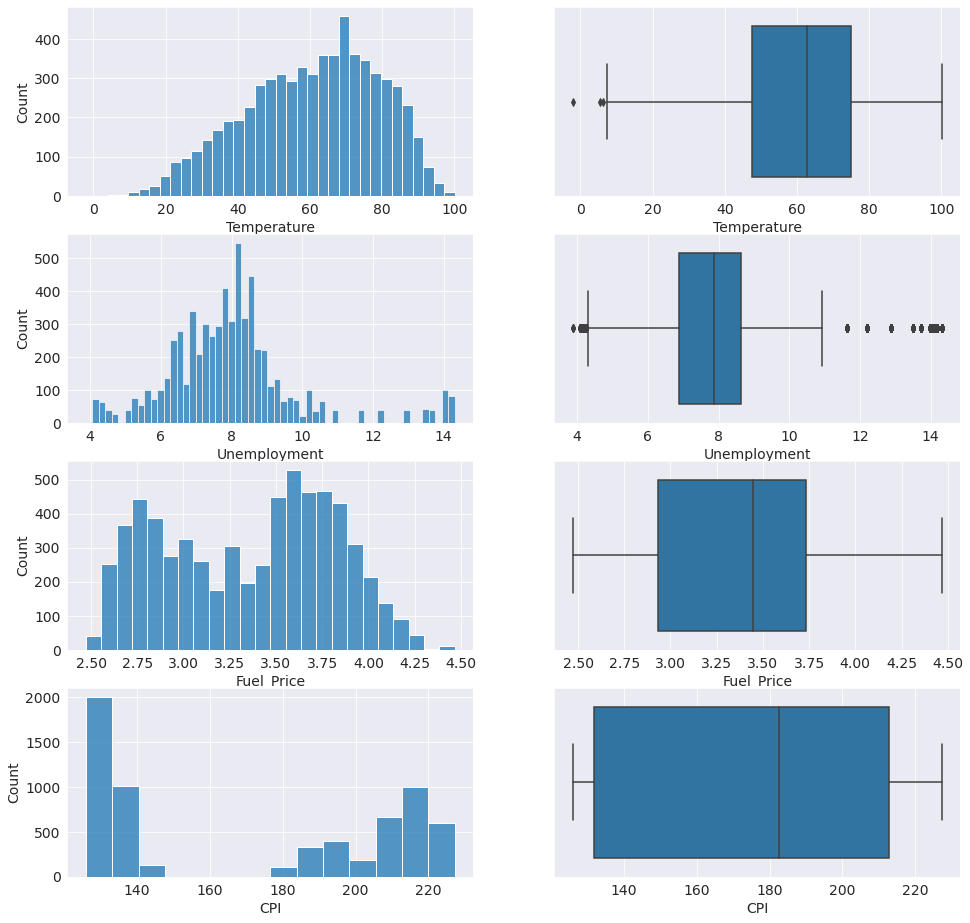

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
# axes[0,0].set_title('Temperature')
sns.histplot(x= 'Temperature', data= df, ax= axes[0,0])

sns.boxplot(x= 'Temperature', data= df, ax= axes[0,1])

# axes[1,0].set_title('Unemployment')
sns.histplot(x= 'Unemployment', data= df, ax= axes[1,0])

sns.boxplot(x= 'Unemployment', data= df, ax= axes[1,1])

# axes[2,0].set_title('Fuel_Price')
sns.histplot(x= 'Fuel_Price', data= df, ax= axes[2,0])

sns.boxplot(x = 'Fuel_Price', data= df, ax= axes[2,1])

# axes[3,0].set_title('CPI')
sns.histplot(x= 'CPI', data= df, ax= axes[3,0])

sns.boxplot(x= 'CPI', data= df, ax= axes[3,1]);

The outplier is present in **Tempeature** and **Unemployment** data set

In [ ]:
#outlie removing from Temperature
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Temperature'] <= (Q3+(1.5*IQR))]
df = df[df['Temperature'] >= (Q1-(1.5*IQR))]

In [ ]:
#outlie removing from Unemployment 
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Unemployment'] <= (Q3+(1.5*IQR))]
df = df[df['Unemployment'] >= (Q1-(1.5*IQR))]

In [ ]:
df.shape

(5951, 10)

On the process of removing outlier, **484 data** points are removed from data-set

**Encoding**

In [ ]:
cat_cols = ['Store', 'Holiday_Flag', 'weekday', 'month', 'year']

In [ ]:
df[cat_cols].nunique()

Store           45
Holiday_Flag     2
weekday          7
month           12
year             3
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[cat_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names(cat_cols))
print(encoded_cols)

In [ ]:
df[encoded_cols] = encoder.transform(df[cat_cols])

In [ ]:
df.shape

(5951, 79)

**Standardization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(data = scaled_df, columns = df.columns)

In [ ]:
scaled_df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2010,year_2011,year_2012
0,0.0,0.397291,0.0,0.376025,0.050100,0.840500,0.573889,1.000000,0.363636,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.396811,1.0,0.335024,0.038076,0.841941,0.573889,0.500000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.388501,0.0,0.350345,0.021042,0.842405,0.573889,0.666667,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Train-Test-Split**

In [ ]:
X = scaled_df.drop('Weekly_Sales', axis=1)
y = scaled_df['Weekly_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4760, 78), (1191, 78), (4760,), (1191,))

**Feature Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [ ]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=X_train.shape[1]-i)           
    rfe = rfe.fit(X_train, y_train)

    LR = LinearRegression()
    LR.fit(X_train.loc[:,rfe.support_], y_train)

    pred1 = LR.predict(X_train.loc[:,rfe.support_])
    pred2 = LR.predict(X_test.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

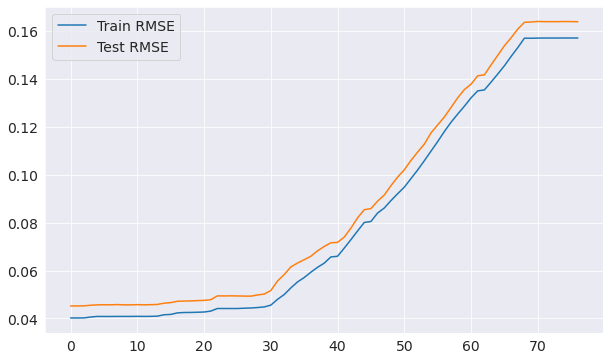

In [ ]:
plt.plot(Trr, label= 'Train RMSE')
plt.plot(Tss, label= 'Test RMSE')
plt.legend()
plt.show()

If we Recursively Eleminate at most **Ten** features then the score is maximum

In [ ]:
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=X_train.shape[1]-9)           
rfe = rfe.fit(X_train, y_train)
LR = LinearRegression()
LR.fit(X_train.loc[:,rfe.support_], y_train)
pred1 = LR.predict(X_train.loc[:,rfe.support_])
pred2 = LR.predict(X_test.loc[:,rfe.support_])

print("MSE train",np.sqrt(mean_squared_error(y_train, pred1)))
print("MSE test",np.sqrt(mean_squared_error(y_test, pred2)))
print("r2_score train - {}".format(r2_score(y_train, pred1)))
print("r2_score test - {}".format(r2_score(y_test, pred2)))

MSE train 0.04085999953456716
MSE test 0.04569350618906344
r2_score train - 0.9324387485162124
r2_score test - 0.9223162582948724


In [ ]:
X_train = X_train.loc[:,rfe.support_]
X_test = X_test.loc[:,rfe.support_]

**Linear Regression**

In [ ]:
lr =LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_train)
pred2 = lr.predict(X_test)

print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred2))))
print("r2_score train {}".format(r2_score(y_train, pred1)))
print("r2_score test {}".format(r2_score(y_test, pred2)))

Root Mean Squared Error train 0.0016695395619648289
Root Mean Squared Error test 0.04569350618906344
r2_score train 0.9324387485162124
r2_score test 0.9223162582948724


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(X_train, y_train)
predrr1 = rr.predict(X_train)
predrr2 = rr.predict(X_test)
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predrr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predrr2))))
print("r2_score train {}".format(r2_score(y_train, predrr1)))
print("r2_score test {}".format(r2_score(y_test, predrr2)))

Root Mean Squared Error train 0.0016713833486400986
Root Mean Squared Error test 0.04580603645234492
r2_score train 0.9323641360074176
r2_score test 0.9219331606995953


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train, y_train)
predlr1 = lr.predict(X_train)
predlr2 = lr.predict(X_test)
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predlr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predlr2))))
print("r2_score train {}".format(r2_score(y_train, predlr1)))
print("r2_score test {}".format(r2_score(y_test, predlr2)))

Root Mean Squared Error train 0.024711495499242828
Root Mean Squared Error test 0.16395383804559885
r2_score train 0.0
r2_score test -0.00014816618161050954


**ElasticNet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
predlr1 = en.predict(X_train)
predlr2 = en.predict(X_test)
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, predlr1))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, predlr2))))
print("r2_score train {}".format(r2_score(y_train, predlr1)))
print("r2_score test {}".format(r2_score(y_test, predlr2)))

Root Mean Squared Error train 0.024711495499242828
Root Mean Squared Error test 0.16395383804559885
r2_score train 0.0
r2_score test -0.00014816618161050954


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
Trr = []
Tss = []
for i in range(2,4):
  poly_reg = PolynomialFeatures(degree = i)
  pl_X_train = poly_reg.fit_transform(X_train)
  pl_X_test = poly_reg.fit_transform(X_test)
  lr = LinearRegression()
  lr.fit(pl_X_train, y_train)
  pred_poly_train = lr.predict(pl_X_train)
  Trr.append(np.sqrt(mean_squared_error(y_train, pred_poly_train)))
  pred_poly_test = lr.predict(pl_X_test)
  Tss.append(np.sqrt(mean_squared_error(y_test, pred_poly_test)))

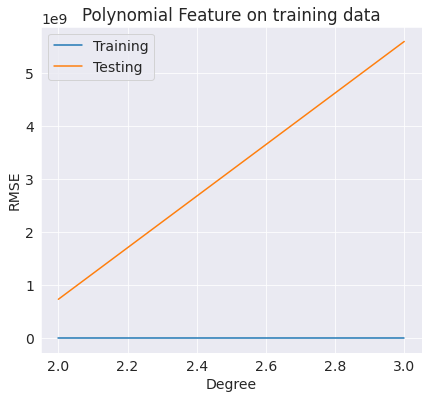

In [ ]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,4), Trr, label= 'Training')
plt.plot(range(2,4), Tss, label= 'Testing')
plt.title('Polynomial Feature on training data')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()

It is clear that in between 2-4 degree polynomial regression 2 has Bais-variance tradeoff

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
pl_X_train = poly_reg.fit_transform(X_train)
pl_X_test = poly_reg.fit_transform(X_test)
lr = LinearRegression()
lr.fit(pl_X_train, y_train)
pred_poly_train = lr.predict(pl_X_train)
print("r2_score train {}".format(r2_score(pred_poly_train, y_train)))
pred_poly_test = lr.predict(pl_X_test)
print("r2_score test {}".format(r2_score(pred_poly_test, y_test)))
print("Root Mean Squared Error train {}".format(np.mean(mean_squared_error(y_train, pred_poly_train))))
print("Root Mean Squared Error test {}".format(np.sqrt(mean_squared_error(y_test, pred_poly_test))))

r2_score train 0.9563932198334125
r2_score test -0.0005599911350040454
Root Mean Squared Error train 0.0010346077251656776
Root Mean Squared Error test 730742413.004261


In [ ]:
#creating a tabel 
tabel = {
        'Train R2': [0.9324387485162124, 0.9323641360074176, 0.0, 0.0, 0.9563932198334125],
        'Test R2' : [0.9223162582948724, 0.9219331606995953, -0.00014816618161050954, -0.00014816618161050954, -0.0005599911350040454],
        'Train RMSE' : [0.0016695395619648289, 0.0016713833486400986, 0.024711495499242828, 0.024711495499242828, 0.0010346077251656776 ],
        'Test RMSE' : [0.04569350618906344, 0.04580603645234492, 0.16395383804559885, 0.16395383804559885, 730742413.004261 ]
        }

In [ ]:
df_new = pd.DataFrame(tabel) 

In [ ]:
df_new.index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Polynomial Regression']

In [ ]:
df_new

,Train R2,Test R2,Train RMSE,Test RMSE
Linear Regression,0.932439,0.922316,0.001670,4.569351e-02
Ridge Regression,0.932364,0.921933,0.001671,4.580604e-02
Lasso Regression,0.000000,-0.000148,0.024711,1.639538e-01
ElasticNet Regression,0.000000,-0.000148,0.024711,1.639538e-01
Polynomial Regression,0.956393,-0.000560,0.001035,7.307424e+08


It is clear that Linear Regression is the Best Model in the dataset, with test accuracy of 92%(approx). 

To improve the accuracy further we can apply other regressor i.e. Random Forest, G

Now I am going to imporve the accuracy till 98% - 99%. For this I have to use Decision Tree or Random Forest etc.

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred_dt1 = dt.predict(X_train)
pred_dt2 = dt.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_dt1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_dt2))))
print('Accuracy Score train: ', dt.score(X_train, y_train))
print('Accuracy Score test: ', dt.score(X_test, y_test))

RMSE for train 0.02816270639447925
RMSE for test 0.05659037012899937
Accuracy Score train:  0.9679040861170889
Accuracy Score test:  0.8808466556220073


In [ ]:
max_depth_range = np.arange(1,40,1)
for x in max_depth_range:
  dt = DecisionTreeRegressor(max_depth= x)
  dt.fit(X_train, y_train)
  pred_dt1 = dt.predict(X_train)
  pred_dt2 = dt.predict(X_test)
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_dt1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_dt2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

Decision Tree has maximum accuracy at **maximum depth 39** 

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
pred_rfc1 = rfc.predict(X_train)
pred_rfc2 = rfc.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_rfc1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_rfc2))))
print('Accuracy Score train: ', dt.score(X_train, y_train))
print('Accuracy Score test: ', dt.score(X_test, y_test))

RMSE for train 0.028304398176036298
RMSE for test 0.051356545554440226
Accuracy Score train:  0.9520754860405363
Accuracy Score test:  0.8969168840066629


In [ ]:
max_depth_range = np.arange(1,40,1)
for x in max_depth_range:
  dt = RandomForestRegressor(max_depth= x)
  dt.fit(X_train, y_train)
  pred_xg1 = dt.predict(X_train)
  pred_xg2 = dt.predict(X_test)
  print('for max_depth: ', x)
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

In the depth of **36** the** Random Forest Regressor** has its maximum value of accuracy.

In [ ]:
rfc = RandomForestRegressor(max_depth = 36)
rfc.fit(X_train, y_train)
pred_rfc1 = rfc.predict(X_train)
pred_rfc2 = rfc.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_rfc1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_rfc2))))
print('Accuracy Score train: ', rfc.score(X_train, y_train))
print('Accuracy Score test: ', rfc.score(X_test, y_test))

RMSE for train 0.02992618589836856
RMSE for test 0.051110374979016944
Accuracy Score train:  0.9637587048322853
Accuracy Score test:  0.9028060343874318


**XG Boost Regressor**

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)

In [ ]:
pred_xg1 = xg.predict(X_train)
pred_xg2 = xg.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))

RMSE for train 0.06244578034875512
RMSE for test 0.0686852771272921


In [ ]:
max_depth_range = np.arange(1,15,1)
for x in max_depth_range:
  dt = XGBRegressor(max_depth= x)
  dt.fit(X_train, y_train)
  pred_xg1 = dt.predict(X_train)
  pred_xg2 = dt.predict(X_test)
  print('for max_depth: ', x)
  print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
  print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

It means **maximun depth 9** has best value of Accuracy

In [ ]:
xg = XGBRegressor(max_depth = 9)
xg.fit(X_train, y_train)
pred_xg1 = xg.predict(X_train)
pred_xg2 = xg.predict(X_test)
print("RMSE for train {}".format(np.sqrt(mean_squared_error(y_train, pred_xg1))))
print("RMSE for test {}".format(np.sqrt(mean_squared_error(y_test, pred_xg2))))
print('Accuracy Score train: ', xg.score(X_train, y_train))
print('Accuracy Score test: ', xg.score(X_test, y_test))

[19:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for train 0.03137907401148098
RMSE for test 0.04876553192516943
Accuracy Score train:  0.9601543222728802
Accuracy Score test:  0.9115195955339979


In [ ]:
tabel1 = {
        'Train Score': [0.9679040861170889, 0.9637587048322853, 0.9601543222728802], 
        'Test Score' : [0.8808466556220073, 0.9028060343874318, 0.9115195955339979],
        'Train RMSE' : [0.02816270639447925, 0.02992618589836856, 0.03137907401148098],
        'Test RMSE' :  [0.05659037012899937, 0.051110374979016944, 0.04876553192516943]
        }

In [ ]:
df1 = pd.DataFrame(tabel1) 

In [ ]:
df1

,Train Score,Test Score,Train RMSE,Test RMSE
0,0.967904,0.880847,0.028163,0.056590
1,0.963759,0.902806,0.029926,0.051110
2,0.960154,0.911520,0.031379,0.048766


In [ ]:
df1.index = ['Decision Tree', 'Random Forest', 'XGBoost']

In [ ]:
df1

,Train Score,Test Score,Train RMSE,Test RMSE
Decision Tree,0.967904,0.880847,0.028163,0.056590
Random Forest,0.963759,0.902806,0.029926,0.051110
XGBoost,0.960154,0.911520,0.031379,0.048766


Among the method XGBoost is the best method for the data set

By Comparising the Linear and XGBoost we can conclude that linear Regression the best suited for the above data set